In [ ]:
#!pip install -U scikit-learn
#!pip install pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm

### Loading file

In [2]:
train = pd.read_csv('train.csv',parse_dates = ["DATE"])
train.set_index('DATE',inplace=True)

In [3]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year
DATE,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,2,2,2017


### Quadratic variable

In [4]:
train['QuadraticTemp'] = train.HourlyDryBulbTemperature ** 2

### Standarization

In [5]:
train['QuadraticTemp']= (train['QuadraticTemp']-train['QuadraticTemp'].mean())/train['QuadraticTemp'].std()
train['HourlyDryBulbTemperature']= (train['HourlyDryBulbTemperature']-train['HourlyDryBulbTemperature'].mean())/train['HourlyDryBulbTemperature'].std()

In [6]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560


### Linear Regression OLS.from_formula

In [7]:
model = sm.OLS.from_formula('mw ~ HourlyDryBulbTemperature + QuadraticTemp +C(Hour) + C(Weekday) + C(Month)', data=train).fit()

In [8]:
model.summary()
#R-squared:	0.840

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3180.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:46:11   Log-Likelihood:            -1.5750e+05
No. Observations:               25560   AIC:                         3.151e+05
Df Residuals:                   25517   BIC:                         3.154e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1421.8466      5.323    267.099      0.000    1411.413    1432.281
C(Hour)[T.1]               -30.6327      4.978     -6.153      0.000     -40.391     -20.875
C(Hour)[T.2]               -45.2186      4.979     -9.082      0.000     -54.978     -35.459
C(Hour)[T.3]               -37.6599      4.980     -7.562      0.000     -47.421     -27.899
C(Hour)[T.4]                 3.6993      4.981      0.743      0.458      -6.064      13.462
C(Hour)[T.5]                70.8149      4.981     14.216      0.000      61.051      80.579
C(Hour)[T.6]               137.1560      4.980     27.542      0.000     127.395     146.917
C(Hour)[T.7]               187.2288      4.979     37.603      0.000     177.470     196.988
C(Hour)[T.8]               222.3339      4.983     44.621      0.000     212.568     232.100
C(Hour)[T.9]               248.2601      4.993     49.720      0.000     238.473     258.047
C(Hour)[T.10]              263.2373      5.009     52.556      0.000     253.420     273.055
C(Hour)[T.11]              272.3047      5.025     54.194      0.000     262.456     282.153
C(Hour)[T.12]              277.4506      5.040     55.051      0.000     267.572     287.329
C(Hour)[T.13]              278.5540      5.050     55.163      0.000     268.656     288.452
C(Hour)[T.14]              277.2297      5.054     54.855      0.000     267.324     287.136
C(Hour)[T.15]              285.0648      5.049     56.460      0.000     275.168     294.961
C(Hour)[T.16]              298.5977      5.036     59.288      0.000     288.726     308.469
C(Hour)[T.17]              316.3992      5.020     63.025      0.000     306.559     326.239
C(Hour)[T.18]              324.4915      5.004     64.844      0.000     314.683     334.300
C(Hour)[T.19]              321.8178      4.992     64.464      0.000     312.033     331.603
C(Hour)[T.20]              290.0366      4.986     58.170      0.000     280.264     299.809
C(Hour)[T.21]              216.5732      4.982     43.471      0.000     206.808     226.338
C(Hour)[T.22]              127.6823      4.980     25.641      0.000     117.922     137.443
C(Hour)[T.23]               50.5035      4.979     10.144      0.000      40.745      60.262
C(Weekday)[T.1]              9.8061      2.691      3.645      0.000       4.532      15.080
C(Weekday)[T.2]             20.4414      2.688      7.604      0.000      15.172      25.710
C(Weekday)[T.3]             17.4367      2.693      6.476      0.000      12.159      22.714
C(Weekday)[T.4]              1.3635      2.693      0.506      0.613      -3.914       6.641
C(Weekday)[T.5]            -99.3837      2.693    -36.908      0.000    -104.662     -94.106
C(Weekday)[T.6]           -115.8226      2.690    -43.052      0.000    -121.096    -110.549
C(Month)[T.2] 

### Plot the scatter plot between energy and temperature (as in the previous section), but only for the months of January and July

In [9]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560


In [10]:
january_data = train['2018-01-01':'2018-01-31']

In [11]:
january_data.tail()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2018-01-31 19:53:00,1700.939,-0.711417,19,2,1,2018,-0.836627
2018-01-31 20:53:00,1663.647,-0.658427,20,2,1,2018,-0.794546
2018-01-31 21:53:00,1600.440,-0.658427,21,2,1,2018,-0.794546
2018-01-31 22:53:00,1510.036,-0.658427,22,2,1,2018,-0.794546
2018-01-31 23:53:00,1422.504,-0.658427,23,2,1,2018,-0.794546


In [12]:
july_data = train['2018-07-01':'2018-07-31']

In [13]:
july_data.tail()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2018-07-31 19:53:00,1854.695,0.878288,19,1,7,2018,0.877777
2018-07-31 20:53:00,1829.827,0.825298,20,1,7,2018,0.805564
2018-07-31 21:53:00,1740.153,0.772308,21,1,7,2018,0.734391
2018-07-31 22:53:00,1603.376,0.772308,22,1,7,2018,0.734391
2018-07-31 23:53:00,1510.365,0.772308,23,1,7,2018,0.734391


#### January Scatter plot

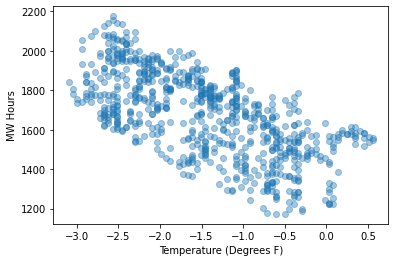

In [14]:
x = january_data.HourlyDryBulbTemperature
y = january_data.mw
plt.scatter(x,y,alpha=0.4)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

#### July Scatter plot

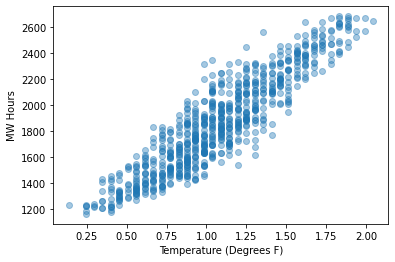

In [15]:
x = july_data.HourlyDryBulbTemperature
y = july_data.mw
plt.scatter(x,y,alpha=0.4)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

#### Daily Relation between temperature and energy 

In [16]:
daily_january_data = train['2018-01-31 00:00:00':'2018-01-31 23:59:59']

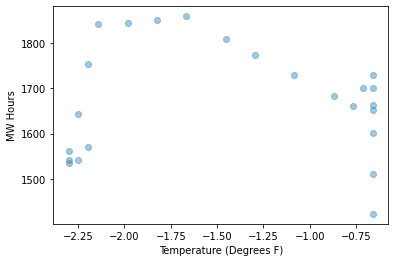

In [17]:
x = daily_january_data.HourlyDryBulbTemperature
y = daily_january_data.mw
plt.scatter(x,y,alpha=0.4)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

In [18]:
daily_july_data = train['2018-07-31 00:00:00':'2018-07-31 23:59:59']

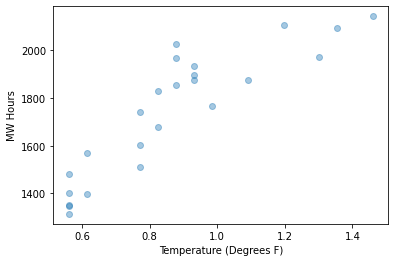

In [19]:
x = daily_july_data.HourlyDryBulbTemperature
y = daily_july_data.mw
plt.scatter(x,y,alpha=0.4)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

#### Adding relations to the model

In [20]:
model = sm.OLS.from_formula('''mw ~ 
HourlyDryBulbTemperature*C(Month)+
QuadraticTemp*C(Month)+
HourlyDryBulbTemperature*C(Hour)+
QuadraticTemp*C(Hour) + C(Weekday)*C(Hour)
''', data=train).fit()

In [21]:
model.summary()
#R-2 = 0.912

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1241.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:46:18   Log-Likelihood:            -1.4795e+05
No. Observations:               25560   AIC:                         2.964e+05
Df Residuals:                   25311   BIC:                         2.984e+05
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                1278.0344     10.629    120.245      0.000    1257.202    1298.867
C(Month)[T.2]                              -2.2786      9.226     -0.247      0.805     -20.362      15.804
C(Month)[T.3]                             -36.7715      9.336     -3.939      0.000     -55.071     -18.472
C(Month)[T.4]                             -21.7844      8.783     -2.480      0.013     -38.999      -4.570
C(Month)[T.5]                              63.6203     10.351      6.146      0.000      43.331      83.910
C(Month)[T.6]                             161.7101     14.569     11.099      0.000     133.153     190.267
C(Month)[T.7]                             134.4879     24.811      5.420      0.000      85.857     183.119
C(Month)[T.8]                             203.3824     21.072      9.652      0.000     162.080     244.685
C(Month)[T.9]                             176.8130     12.967     13.635      0.000     151.396     202.230
C(Month)[T.10]                            116.4219      8.977     12.968      0.000      98.826     134.018
C(Month)[T.11]                            -45.2279     10.491     -4.311      0.000     -65.790     -24.665
C(Month)[T.12]                            -27.2536     10.942     -2.491      0.013     -48.701      -5.806
C(Hour)[T.1]                              -28.3303      9.233     -3.068      0.002     -46.428     -10.232
C(Hour)[T.2]                              -32.2996      9.253     -3.491      0.000     -50.437     -14.163
C(Hour)[T.3]                              -15.7326      9.270     -1.697      0.090     -33.903       2.437
C(Hour)[T.4]                               39.6868      9.285      4.274      0.000      21.488      57.885
C(Hour)[T.5]                              122.5218      9.283     13.198      0.000     104.326     140.717
C(Hour)[T.6]                              187.7941      9.237     20.331      0.000     169.689     205.899
C(Hour)[T.7]                              229.8296      9.191     25.006      0.000     211.815     247.845
C(Hour)[T.8]                              256.4593      9.173     27.957      0.000     238.479     274.439
C(Hour)[T.9]                              275.3467      9.176     30.007      0.000     257.361     293.333
C(Hour)[T.10]                             287.6606      9.189     31.303      0.000     269.649     305.673
C(Hour)[T.11]                             294.5350      9.204     32.002      0.000     276.495     312.575
C(Hour)[T.12]                             303.7225      9.213     32.967      0.000     285.665     321.780
C(Hour)[T.13]                             293.9256      9.226     31.859      0.000     275.842     312.009
C(Hour)[T.14]                             289.0095      9.2

In [22]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560


In [23]:
model2 = sm.OLS.from_formula('''mw ~ HourlyDryBulbTemperature + 
QuadraticTemp +
C(Weekday) + 
C(Month) + 
HourlyDryBulbTemperature*C(Month)+
QuadraticTemp*C(Month)+
C(Hour)+
HourlyDryBulbTemperature*C(Hour)+
QuadraticTemp*C(Hour)+
mw *C(Hour)
''', data=train).fit()

model2 = sm.OLS.from_formula('''mw ~ 
HourlyDryBulbTemperature*C(Month)+
QuadraticTemp*C(Month)+
HourlyDryBulbTemperature*C(Hour)+
QuadraticTemp*C(Hour) + C(Weekday)*C(Hour)
''', data=train).fit()

In [25]:
print(model2.summary())
#R-2 = 1

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1241.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:46:26   Log-Likelihood:            -1.4795e+05
No. Observations:               25560   AIC:                         2.964e+05
Df Residuals:                   25311   BIC:                         2.984e+05
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Calculating MAPE

In [26]:
test = pd.read_csv('test.csv',parse_dates = ["DATE"])
test.set_index('DATE',inplace=True)

In [27]:
test['QuadraticTemp'] = test.HourlyDryBulbTemperature ** 2

In [39]:
test['QuadraticTemp']= (test['QuadraticTemp']-test['QuadraticTemp'].mean())/test['QuadraticTemp'].std()
test['HourlyDryBulbTemperature']= (test['HourlyDryBulbTemperature']-test['HourlyDryBulbTemperature'].mean())/test['HourlyDryBulbTemperature'].std()

In [40]:
test.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp
DATE,,,,,,,
2020-01-01 00:53:00,1363.428,-0.435454,0,2,1,2020,-0.506710
2020-01-01 01:53:00,1335.975,-0.627840,1,2,1,2020,-0.655346
2020-01-01 02:53:00,1296.817,-0.531647,2,2,1,2020,-0.582267
2020-01-01 03:53:00,1288.403,-0.531647,3,2,1,2020,-0.582267
2020-01-01 04:53:00,1292.263,-0.435454,4,2,1,2020,-0.506710


In [41]:
forecast = model2.predict(train)

In [42]:
df_forecast_train = pd.DataFrame(forecast,columns=['pred_mw'])

In [43]:
MAPE = 1 / len(train)* sum(abs((train.mw - df_forecast_train.pred_mw)/ train.mw) * 100)
print(f'MAPE: {int(MAPE)}')

MAPE: 3


In [44]:
forecast_test = model2.predict(test)

In [45]:
df_forecast_test = pd.DataFrame(forecast_test,columns=['pred_mw'])

In [46]:
MAPE_TEST = 1 / len(test)* sum(abs((test.mw - df_forecast_test.pred_mw)/ test.mw) * 100)
print(f'MAPE: {int(MAPE_TEST)}')

MAPE: 3


In [47]:
## ?? What I'm doing wrong???

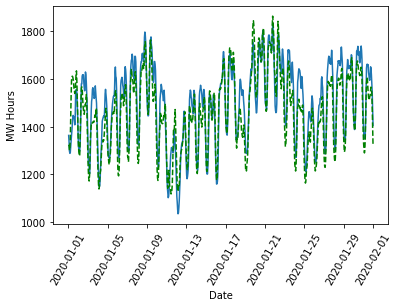

In [57]:
plt.plot(test.index,test.mw)
plt.plot(df_forecast_test.index,df_forecast_test.pred_mw , color='green', linestyle='--')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('MW Hours')
plt.show()
